# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1: Alina 5247

## Part 2 - Initial Preparations 

In [2]:
# Init import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Suppress warnings for clean output
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the datasets
wine_train = pd.read_csv('./wine_train.csv')
wine_test = pd.read_csv('./wine_test.csv')

In [30]:
# First five rows of the training set
print("First five rows of the training set:")
display(wine_train.head())

# First five rows of the test set
print("First five rows of the test set:")
display(wine_test.head())

First five rows of the training set:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2


First five rows of the test set:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


#### Data Set Charachtiristics 
An overview of the dataset’s structure and contents, highlighting key features and patterns to guide further analysis.

In [67]:
# Check for missing values in training and test data
print("Missing values in training data:")
print(wine_train.isna().sum())
print("\n Missing values in test data:")
print(wine_test.isna().sum())


Missing values in training data:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

 Missing values in test data:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
targe

In [32]:
wine_train.shape

(142, 14)

In [33]:
wine_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       142 non-null    float64
 1   malic_acid                    142 non-null    float64
 2   ash                           142 non-null    float64
 3   alcalinity_of_ash             142 non-null    float64
 4   magnesium                     142 non-null    float64
 5   total_phenols                 142 non-null    float64
 6   flavanoids                    142 non-null    float64
 7   nonflavanoid_phenols          142 non-null    float64
 8   proanthocyanins               142 non-null    float64
 9   color_intensity               142 non-null    float64
 10  hue                           142 non-null    float64
 11  od280/od315_of_diluted_wines  142 non-null    float64
 12  proline                       142 non-null    float64
 13  targe

In [34]:
# Count Unique Values per Feature
for col in wine_train.columns:
    print(f"{col}: {wine_train[col].nunique()} unique values")

alcohol: 106 unique values
malic_acid: 112 unique values
ash: 74 unique values
alcalinity_of_ash: 59 unique values
magnesium: 49 unique values
total_phenols: 86 unique values
flavanoids: 117 unique values
nonflavanoid_phenols: 35 unique values
proanthocyanins: 85 unique values
color_intensity: 110 unique values
hue: 72 unique values
od280/od315_of_diluted_wines: 107 unique values
proline: 103 unique values
target: 3 unique values


In [35]:
# Check for Duplicate Records
duplicate_rows = wine_train.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


#### Summary
* <b>Training and Test Sets:</b> Both sets contain 14 features related to the chemical properties of wines and a target variable indicating the wine class.
* The first five rows show diverse values across features like alcohol, malic acid, ash, and proline.
* Significant range and variation in feature values suggest a rich dataset suitable for modeling.
* No duplicate rows found in the training set, ensuring data uniqueness and integrity.
#### Key Features: 
* <b>Chemical Properties:</b> Features such as alcohol content, malic acid, ash etc.
* <b>Target Variable:</b> The target column classifies the wine into different classes, essential for classification tasks.

## EDA

#### Basic Statistics

In [36]:
# Get basic statistics of the training data
print("Basic statistics of the training data:")
display(wine_train.describe())

Basic statistics of the training data:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,12.997254,2.297746,2.361690,19.419718,99.943662,2.315986,2.063592,0.346690,1.561901,5.030211,0.958563,2.638873,742.457746,0.922535
std,0.789931,1.093317,0.283231,3.354815,13.683751,0.639469,1.005302,0.117562,0.540979,2.239593,0.219631,0.718083,317.250905,0.772524
min,11.410000,0.740000,1.360000,10.600000,78.000000,0.980000,0.340000,0.130000,0.420000,1.280000,0.480000,1.290000,278.000000,0.000000
25%,12.370000,1.592500,2.222500,17.250000,88.000000,1.782500,1.257500,0.260000,1.250000,3.180000,0.800000,1.922500,500.000000,0.000000
50%,13.050000,1.865000,2.360000,19.250000,98.000000,2.380000,2.155000,0.320000,1.505000,4.800000,0.960000,2.815000,660.000000,1.000000
75%,13.637500,3.020000,2.557500,21.375000,108.000000,2.822500,2.887500,0.430000,1.870000,6.182500,1.120000,3.197500,957.500000,2.000000
max,14.750000,5.650000,3.230000,30.000000,151.000000,3.880000,5.080000,0.630000,3.580000,11.750000,1.450000,4.000000,1680.000000,2.000000


In [37]:
# Get basic statistics of the testing data
print("Basic statistics of the testing data:")
display(wine_train.describe())

Basic statistics of the testing data:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,12.997254,2.297746,2.361690,19.419718,99.943662,2.315986,2.063592,0.346690,1.561901,5.030211,0.958563,2.638873,742.457746,0.922535
std,0.789931,1.093317,0.283231,3.354815,13.683751,0.639469,1.005302,0.117562,0.540979,2.239593,0.219631,0.718083,317.250905,0.772524
min,11.410000,0.740000,1.360000,10.600000,78.000000,0.980000,0.340000,0.130000,0.420000,1.280000,0.480000,1.290000,278.000000,0.000000
25%,12.370000,1.592500,2.222500,17.250000,88.000000,1.782500,1.257500,0.260000,1.250000,3.180000,0.800000,1.922500,500.000000,0.000000
50%,13.050000,1.865000,2.360000,19.250000,98.000000,2.380000,2.155000,0.320000,1.505000,4.800000,0.960000,2.815000,660.000000,1.000000
75%,13.637500,3.020000,2.557500,21.375000,108.000000,2.822500,2.887500,0.430000,1.870000,6.182500,1.120000,3.197500,957.500000,2.000000
max,14.750000,5.650000,3.230000,30.000000,151.000000,3.880000,5.080000,0.630000,3.580000,11.750000,1.450000,4.000000,1680.000000,2.000000


#### Conclusion
While most features exhibit stable distributions, certain variables like proline and malic acid indicate potential skewness and outliers due to their wide ranges and mean values significantly higher than the median.

#### Class Distribution
A necessary initial check to ensure the target distribution is balanced and appropriate for modeling

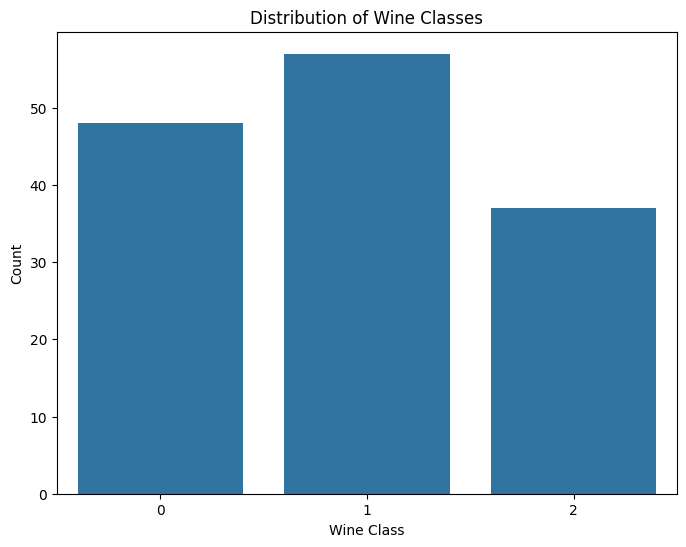

In [38]:
# Plot the distribution of the target variable
plt.figure(figsize=(8,6))
sns.countplot(x='target', data=wine_train)
plt.title('Distribution of Wine Classes')
plt.xlabel('Wine Class')
plt.ylabel('Count')
plt.show()

### Features Correlation Matrix
Identifying how features are linearly related to each other

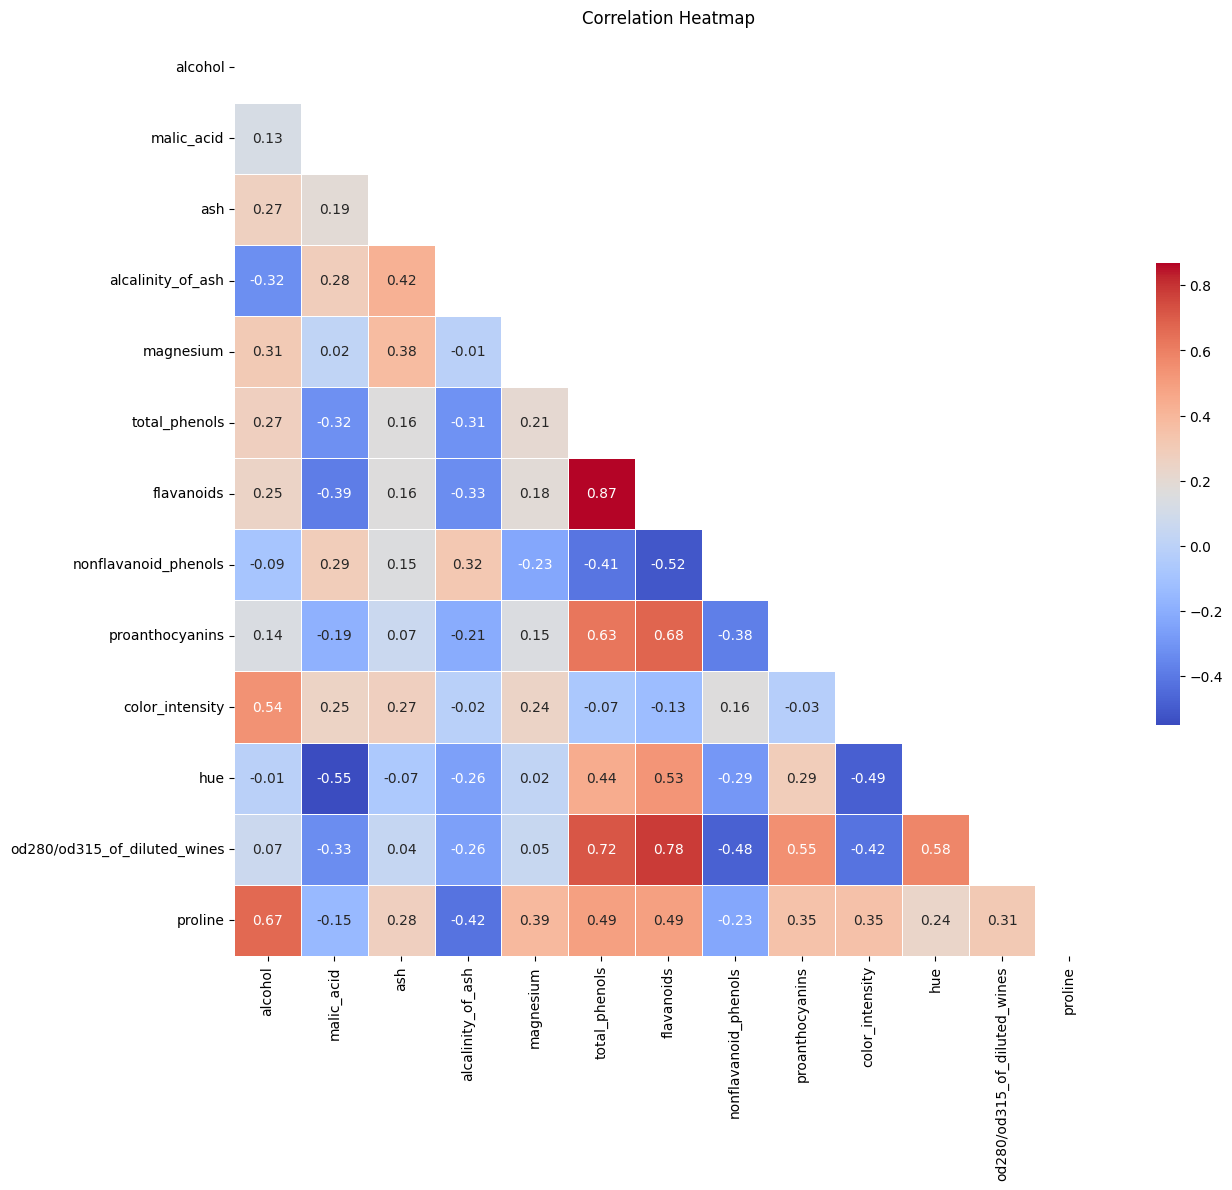

In [39]:
# Exclude 'target' from correlation matrix
features = wine_train.drop('target', axis=1)
corr_matrix = features.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Draw the heatmap with the mask 
sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap='coolwarm',
    annot=True,
    fmt='.2f',
    linewidths=0.5,
    cbar_kws={"shrink": .5},
    xticklabels=corr_matrix.columns,
    yticklabels=corr_matrix.columns
)

# Add title and labels
plt.title('Correlation Heatmap')
plt.show()

#### HeatMap Overview:
* High correlation between total_phenols and flavanoids (0.87), indicating redundancy.
* Correlation between od280/od315_of_diluted_wines and flavanoids (0.78) suggests similar information is captured by both features.
* Low correlation features like malic_acid and nonflavanoid_phenols could provide unique information, warranting further investigation.

#### Further Features Analysis

In [40]:
# Set a correlation threshold (e.g., 0.75) to detect highly correlated features
correlation_threshold = 0.75

# Mask the upper triangle to avoid duplicate pairs
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Apply the mask to the correlation matrix
masked_corr_matrix = corr_matrix.mask(mask)

# Filter for pairs with correlation higher than the threshold
high_corr_pairs = masked_corr_matrix.stack().reset_index()
high_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_corr_pairs = high_corr_pairs[high_corr_pairs['Correlation'].abs() > correlation_threshold]

# Print the high correlation pairs
print(high_corr_pairs)

                       Feature 1      Feature 2  Correlation
20                    flavanoids  total_phenols     0.869634
61  od280/od315_of_diluted_wines     flavanoids     0.781781


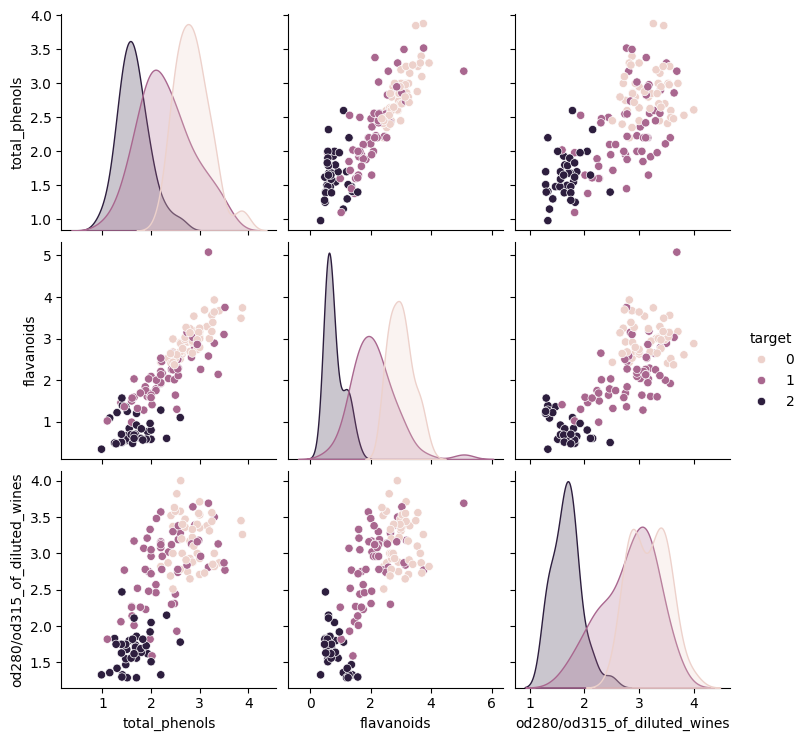

In [41]:
# Pairplot for highly correlated features (adjust based on findings from heatmap)
sns.pairplot(wine_train, vars=['total_phenols', 'flavanoids', 'od280/od315_of_diluted_wines'], hue='target')
plt.show()

#### Pairplot Overview
<b> Separation of Classes:</b>
* Class 0 (light color) has generally lower values for total phenols and flavanoids compared to Class 1 and Class 2.
* Class 2 (dark color) tends to have higher values in both total phenols and od280/od315_of_diluted_wines.

<b> High Correlation:</b>
* The scatterplots show a very strong linear relationship between total phenols and flavanoids (high positive correlation), as well as between flavanoids and od280/od315_of_diluted_wines.
* This confirms what we saw in the heatmap: these features are highly correlated and may be redundant if used together in a model. This could lead to multicollinearity, which might cause issues in linear models like Logistic Regression.

<b>Class Overlap:</b>
There is some overlap between the classes, especially between Class 1 and Class 2 for the feature flavanoids. This might mean that some models could have difficulty separating these classes purely based on this feature.

#### Understanding the High Correlation Between Wine Chemical Properties

The strong correlation between total_phenols, flavanoids, and od280/od315_of_diluted_wines is logical given their connection to the polyphenolic content in wine. Flavanoids are a subgroup of total phenols, and od280/od315_of_diluted_wines measures the concentration of phenolic compounds, including proteins and polyphenols such as flavanoids.

This indicates potential redundancy in the data, which could result in multicollinearity. To mitigate this, I will consider removing or transforming these features and apply Principal Component Analysis (PCA) to reduce redundancy while preserving the underlying information.

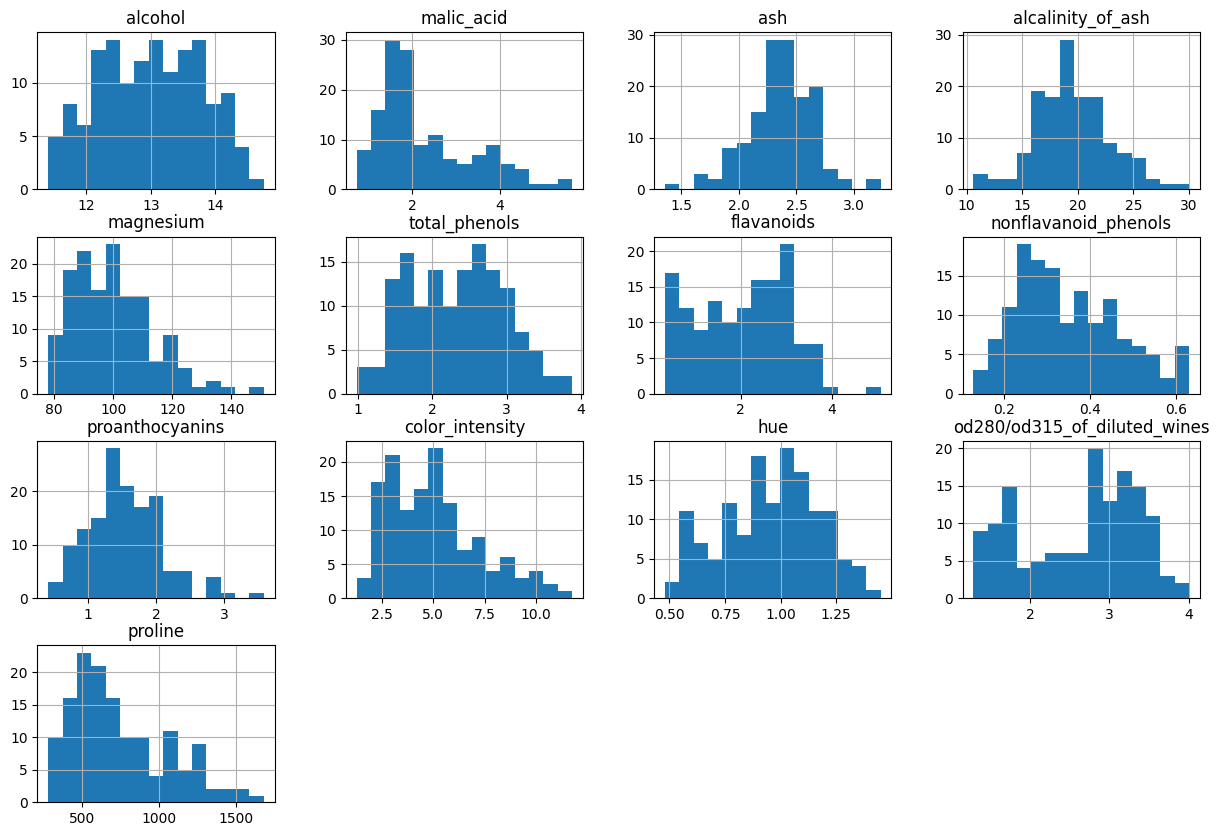

Skewness:
 alcohol                        -0.041431
malic_acid                      1.022816
ash                            -0.245314
alcalinity_of_ash               0.195873
magnesium                       0.785971
total_phenols                   0.093520
flavanoids                      0.023101
nonflavanoid_phenols            0.523546
proanthocyanins                 0.599640
color_intensity                 0.781317
hue                            -0.164468
od280/od315_of_diluted_wines   -0.369087
proline                         0.810048
dtype: float64


In [42]:
# Checking distribution and skewness for important features
wine_train[features.columns].hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.show()

# Calculate skewness to see if any feature is heavily skewed
skewness = wine_train[features.columns].skew()
print("Skewness:\n", skewness)

#### <b>Overview:</b>

* <b> Normal Distribution:</b>

Features like alcohol, ash, total phenols, and od280/od315_of_diluted_wines have relatively symmetric distributions, indicating they are approximately normally distributed.

* <b> Skewed Distributions:</b>

Malic acid and proline are positively skewed (right-skewed). The malic acid distribution is heavily concentrated around lower values, while proline has a long tail, meaning most of the data is concentrated on lower values but with some extreme higher values.
Magnesium, color intensity, and proanthocyanins also show positive skewness.
Hue is slightly negatively skewed, but its distribution is more balanced compared to the others.

* <b> Highly Skewed Features: </b>

Proline has the highest skewness (0.81), followed by magnesium (0.79), and color intensity (0.78). These features are heavily right-skewed, meaning that a large portion of the data is concentrated in lower values, but there are some extreme higher values.

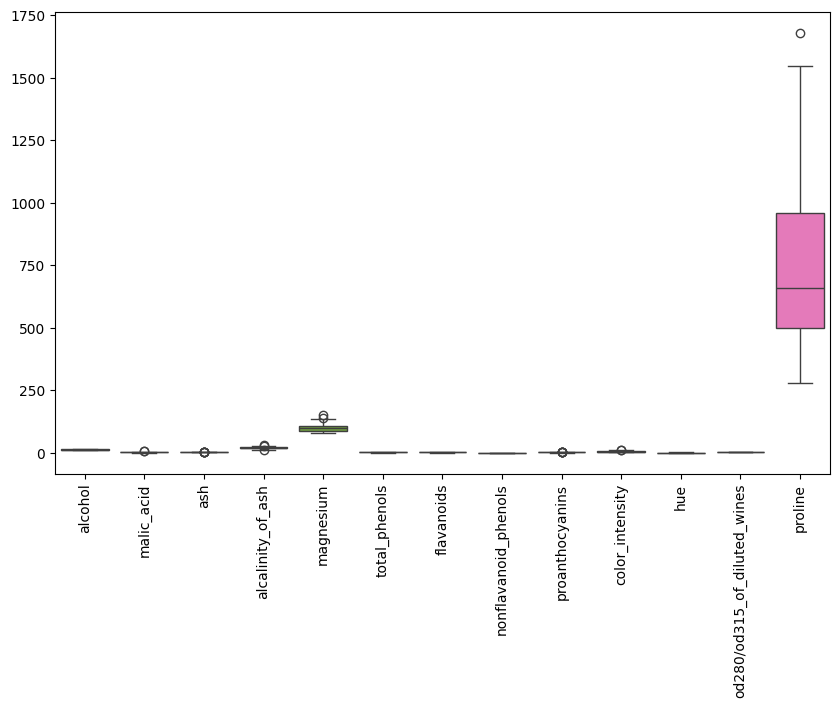

In [43]:
# Boxplot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=wine_train[features.columns])
plt.xticks(rotation=90)
plt.show()


#### Conclusion:

Proline stands out with a much larger scale compared to the other features. This difference in scale could potentially affect the model's performance, particularly in distance-based models like KNN or in gradient-based algorithms (like logistic regression or neural networks).
Other features, such as magnesium, have values that are in a more reasonable range but also have outliers, which might affect the model's robustness.

## Part 3 - Experiments
You could add as many code cells as needed

In [44]:
from sklearn.ensemble import RandomForestClassifier

# After finiding high correlation between some features - 
# checking the importance of each to consider removing some later on

# Prepare Data
X = wine_train.drop('target', axis=1)
y = wine_train['target']

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)
print(feature_importances)

flavanoids                      0.174964
proline                         0.170508
color_intensity                 0.151043
alcohol                         0.136540
od280/od315_of_diluted_wines    0.095440
hue                             0.091282
total_phenols                   0.046030
magnesium                       0.030347
malic_acid                      0.030087
proanthocyanins                 0.029855
alcalinity_of_ash               0.023708
ash                             0.011937
nonflavanoid_phenols            0.008258
dtype: float64


#### Data Preparation


In [45]:
# Separate features and target variable from training data
X_train = wine_train.drop('target', axis=1)
y_train = wine_train['target']

#### Feature Engineering


In [46]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Create a pipeline for combining different feature engineering techniques
# The pipeline allows us to apply multiple transformations sequentially

# 1. StandardScaler for normalization
# 2. PolynomialFeatures to add interactions and higher-degree terms (degree=2 in this case)
# 3. PCA for dimensionality reduction, keeping 95% of the variance
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalization step
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),  # Adding polynomial features
    ('pca', PCA(n_components=0.95))  # Dimensionality reduction step, keeping 95% of variance
])

# Apply the pipeline to the training data
X_transformed = pipeline.fit_transform(X_train)
print(f'Transformed shape: {X_transformed.shape}')


Transformed shape: (142, 39)


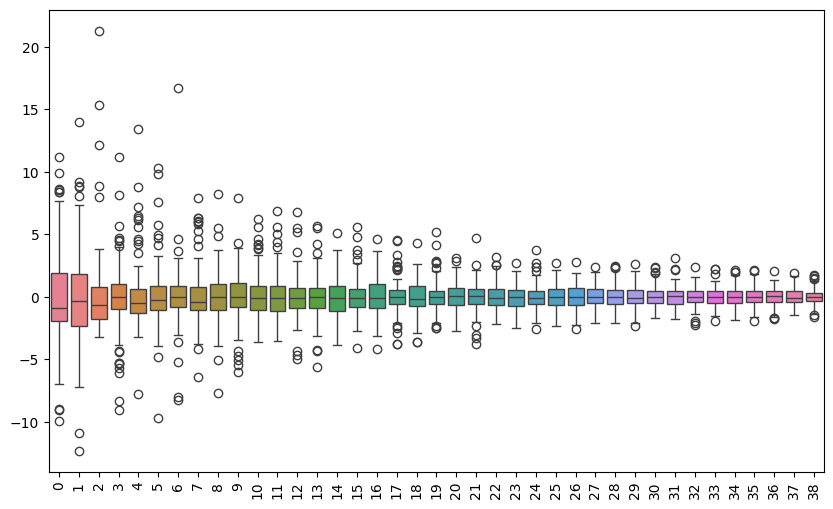

In [70]:
# Boxplot to check normalization outcome
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_transformed)
plt.xticks(rotation=90)
plt.show()

#### Grid Search with Cross-Validation

In [47]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.neighbors import KNeighborsClassifier

# Define models and parameters

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
}

# Define hyperparameters for each model
param_grid = {
    # Logistic Regression hyperparameters
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength: smaller values specify stronger regularization
        'solver': ['liblinear', 'lbfgs', 'saga'],  # Different solvers to optimize the logistic function
        'max_iter': [1000, 5000, 10000, 50000]  # Maximum number of iterations for solver convergence
    },
    
    # Random Forest hyperparameters
    'Random Forest': {
        'n_estimators': [50, 100, 200, 500],  # Number of trees in the forest
        'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
        # 'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
        'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
        'bootstrap': [True, False]  # Whether to use bootstrap samples when building trees
    },
    
    # K-Nearest Neighbors hyperparameters
    'KNN': {
        'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to consider (k)
        'weights': ['uniform', 'distance'],  # Weight function used in prediction (uniform: equal, distance: weighted)
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm to compute the nearest neighbors
        'p': [1, 2]  # Power parameter for the Minkowski metric (p=1: Manhattan, p=2: Euclidean)
    }
}

In [48]:
# Define a scorer using macro-average F1 score
scorer = make_scorer(f1_score, average='macro')

# Run Grid Search with 5-fold cross-validation for Random Forest
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(), 
                              param_grid=param_grid['Random Forest'], 
                              scoring=scorer, 
                              cv=5)

grid_search_rf.fit(X_train, y_train)

# Run Grid Search for Logistic Regression
grid_search_lr = GridSearchCV(estimator=LogisticRegression(), 
                              param_grid=param_grid['Logistic Regression'], 
                              scoring=scorer, 
                              cv=5)

grid_search_lr.fit(X_train, y_train)

# Run Grid Search for KNN
grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(), 
                               param_grid=param_grid['KNN'], 
                               scoring=scorer, 
                               cv=5)

grid_search_knn.fit(X_train, y_train)

# Collect the results into a DataFrame
results_df = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression', 'KNN'],
    'Best Macro F1 Score': [
        grid_search_rf.best_score_,
        grid_search_lr.best_score_,
        grid_search_knn.best_score_
    ],
    'Best Params': [
        grid_search_rf.best_params_,
        grid_search_lr.best_params_,
        grid_search_knn.best_params_
    ]
})

# Display the results DataFrame
print("All Model Results:")
print(results_df)

All Model Results:
                 Model  Best Macro F1 Score   
0        Random Forest             0.986320  \
1  Logistic Regression             0.963599   
2                  KNN             0.744289   

                                         Best Params  
0  {'bootstrap': True, 'max_depth': None, 'min_sa...  
1      {'C': 1, 'max_iter': 5000, 'solver': 'lbfgs'}  
2  {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1...  


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [49]:
# Find the model with the highest score
best_model_idx = results_df['Best Macro F1 Score'].idxmax()
best_model_name = results_df.loc[best_model_idx, 'Model']
best_model_params = results_df.loc[best_model_idx, 'Best Params']

print(f"Best Model: {best_model_name}")
print(f"Best Parameters: {best_model_params}")

Best Model: Random Forest
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'n_estimators': 50}


#### Retrain With The Best Model

In [50]:
X = wine_train.drop(columns=['target'])
y = wine_train.target
X_test = wine_test.drop(columns=['target'])
y_test = wine_test.target

# Use the pipeline from before
X_train_transformed = pipeline.fit_transform(X)  
X_test_transformed = pipeline.transform(X_test) 

print(f"Transformed train shape: {X_train_transformed.shape}")

Transformed train shape: (142, 39)


In [51]:
# Retrain the best model on the full training set
if best_model_name == 'Random Forest':
    best_model = RandomForestClassifier(**best_model_params)
elif best_model_name == 'Logistic Regression':
    best_model = LogisticRegression(**best_model_params)
elif best_model_name == 'KNN':
    best_model = KNeighborsClassifier(**best_model_params)

# Train the best model on the transformed train data
best_model.fit(X_train_transformed, y)

RandomForestClassifier(min_samples_leaf=4, n_estimators=50)

## Part 5 - Apply on test and show model performance estimation

In [52]:
# Predict on the transformed test set
y_test_pred = best_model.predict(X_test_transformed)

# Show the first 5 predictions along with actual labels
print("First 5 Predictions vs Actual Labels:")
for i in range(5):
    print(f"Prediction: {y_test_pred[i]}, Actual: {y_test.iloc[i]}")

# Evaluate the model on the test set using the macro-average F1 score
f1_test = f1_score(y_test, y_test_pred, average='macro')
print(f'\nMacro F1 Score on the Test Set: {f1_test:.2f}')

First 5 Predictions vs Actual Labels:
Prediction: 2, Actual: 2
Prediction: 0, Actual: 0
Prediction: 2, Actual: 2
Prediction: 1, Actual: 1
Prediction: 2, Actual: 2

Macro F1 Score on the Test Set: 0.97


In [53]:
# Generate a classification report
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.93      0.96        14
           2       0.92      1.00      0.96        11

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



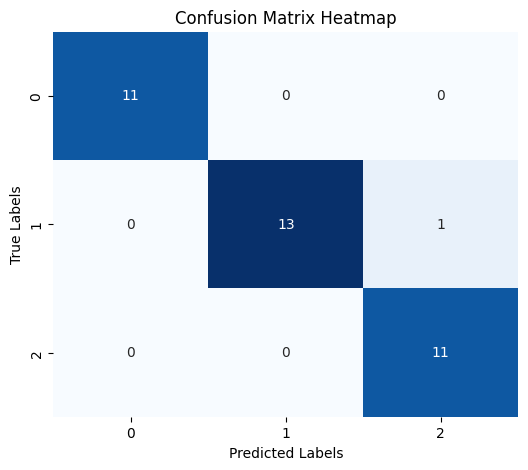

In [54]:
# Generate and plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

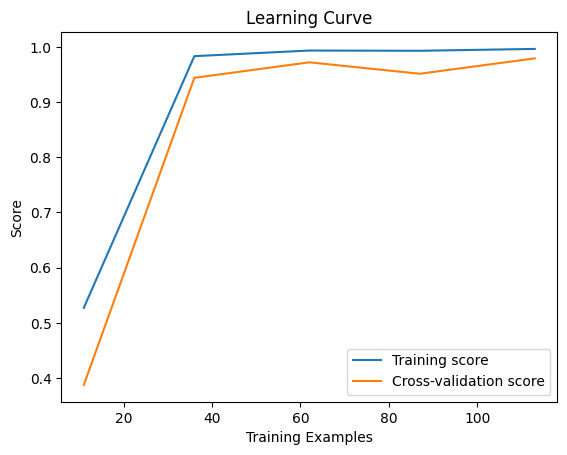

In [59]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5)

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-validation score')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc="best")
plt.show()

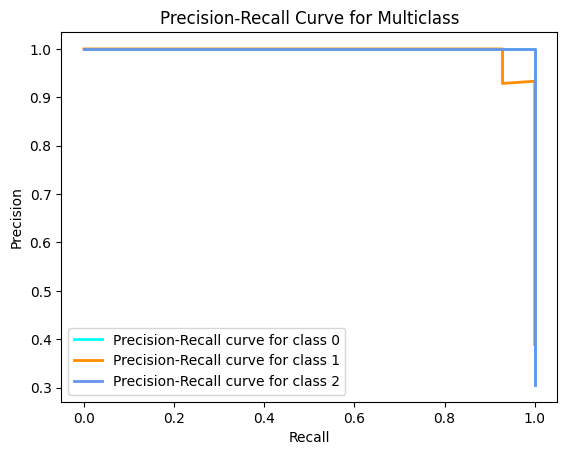

In [61]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

# Binarize the output for multi-class classification
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Predict probabilities for the test set
y_score = best_model.predict_proba(X_test_transformed)

# Plot Precision-Recall curve for each class
precision = dict()
recall = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])

# Plot all Precision-Recall curves
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label=f'Precision-Recall curve for class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multiclass')
plt.legend(loc="lower left")
plt.show()


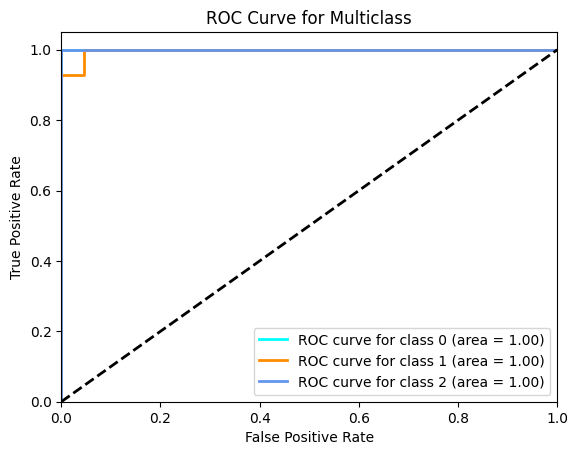

In [63]:
from sklearn.metrics import roc_curve, auc

# Binarize the output for multi-class classification
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Predict probabilities for the test set
y_score = best_model.predict_proba(X_test_transformed)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve for class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass')
plt.legend(loc="lower right")
plt.show()

#### <b> Model Quality - Conclusion From Analysis: </b>

* <b> Learning Curve:</b> The model exhibits high performance on both training and cross-validation sets, with only a slight gap, indicating mild overfitting. The performance plateaus early, suggesting that the model has learned well from the data and adding more examples is unlikely to improve performance significantly.

* <b>Precision-Recall Curve:</b> The precision-recall curves for all three classes are near-perfect, showing the model maintains high precision and recall across all classes. This indicates strong classification ability with minimal false positives or negatives.

* <b>ROC Curve:</b> The ROC curves for all three classes show an AUC of 1.00, representing perfect separation between the classes. This confirms that the model distinguishes the classes effectively with virtually no errors.

### <b> Assignment Conclusion: </b>

The project successfully classified wine types with a high degree of accuracy using a Random Forest model. Feature scaling and hyperparameter tuning were crucial in improving model performance. The high Macro F1 Score and classification report metrics demonstrate that the model can generalize well to unseen data.